<a href="https://colab.research.google.com/github/FGalvao77/Conhecendo-a-biblioteca-CatBoost/blob/main/Conhecendo_a_biblioteca_CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conhecendo a biblioteca `CatBoost`**

---



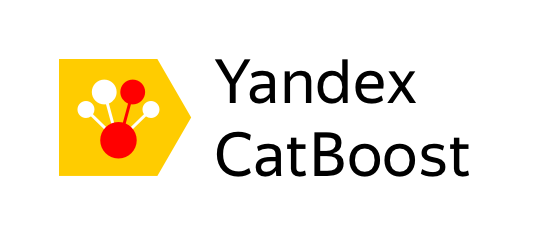

- https://catboost.ai/

O _CatBoost_ é um framework utilizado em aplições de `Machine Learning` para lidar com dados categóricos.

**Curiosidade:** Esta biblioteca é a primeira tecnologia de aprendizado de máquina `Russa` de código aberto.

**O que é o _CatBoost_?**

`CatBoost` é um algoritmo para _aumento de gradiente_ em árvores de decisão. Ele é desenvolvido por pesquisadores e engenheiros da [**Yandex**](https://en.wikipedia.org/wiki/Yandex) e é usado para pesquisa, sistemas de recomendação, assistente pessoal, carros autônomos, previsão do tempo e muitas outras tarefas na Yandex e em outras empresas, incluindo **CERN**, **Cloudflare**, táxi **Careem**.<br><br>

**Outras curiosidades**

- pode ser integrado facilmente na estrutura de aprendizado profundo (`Deep Learning`), como o _TensorFlow_ do Google e o _Core ML_ da Apple. 
- pode trabalhar com diversos tipos de dados para ajudar a resolver uma ampla gama de problemas, é um dos que mais oferece a melhor precisão da classe _target_.
- o nome **CatBoost** vem de duas palavras "**Cat**egory" e "**Boost**ing".
- funciona muito bem como áudio, texto, imagem, incluindo dados históricos.
- `Boost` vem do algoritmo de aprendizado de máquina de aumento de gradiente. O aumento de gradiente é um algoritmo de aprendizado de máquina amplamente aplicado a vários tipos de desafios de negócios, como detecção de fraude, itens de recomendação, previsão e etc.
- pode retornar bons resultados com uma quantidade de dados relativamente pequeno, ao contrário dos modelos de _Deep Learning_ que precisam de uma grande base de dados.

**Vantagens da biblioteca:**
- `desempenho`: manipulaçao de recursos categóricos automaticamente. Podemos usa-lo sem a necessidade de quaisquer pré-processamento explícito para converter categórias em números.
 - converte valores categóricos em números usando várias estatísticas em combinações de recursos categóricos e numéricos.
- `robustez`: reduz a necessidade de ajuste extensivo de hiperparâmetros e diminui as chances de sobreajuste, o que leva a modelos mais generalizados. Pórem há alguns parâmetros que podemos ajustar, como o número de árvores, taxa de aprendizagem, regularização, profundidade da árvore e entre outros.

O **CatBoost** pode ser usado tanto para problemas de _classificação_ e de _regressão_.
- `classificação`: **CatBoostClassifier**.
- `regressão`: **CatBoostRegressor**.

A aplicação da biblioteca **não requer** a conversão do conjunto de dados em nenhum formato específico, como _XGBoost_ e _LigthGBM_.

**Problema de negócio:**

Construir um modelo preditivo e prever as vendas de cada produto de `Outlets`.




**Conjunto de Dados:**

Os dados se refere a vendas do ano de 2020 de 1559 produtos em 10 lojas em diferentes cidades.

In [1]:
# from PIL import Image
# %matplotlib inline

# img = Image.open('/content/AD.PNG')
# img.show()
# img

In [2]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.1 MB/s 


**Importando os conjuntos de dados**

In [3]:
!wget https://raw.githubusercontent.com/FGalvao77/datasets/main/train_BM.csv
!wget https://raw.githubusercontent.com/FGalvao77/datasets/main/test_BM.csv

--2022-01-07 11:45:36--  https://raw.githubusercontent.com/FGalvao77/datasets/main/train_BM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 869537 (849K) [text/plain]
Saving to: ‘train_BM.csv’

train_BM.csv        100%[===================>] 849.16K  --.-KB/s    in 0.05s   

2022-01-07 11:45:36 (16.8 MB/s) - ‘train_BM.csv’ saved [869537/869537]

--2022-01-07 11:45:36--  https://raw.githubusercontent.com/FGalvao77/datasets/main/test_BM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 526291 (514K) [text/plain]
Saving to: ‘tes

In [4]:
%ls

sample_data/  test_BM.csv  train_BM.csv


In [5]:
!head train_BM.csv

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,,Tier 3,Grocery Store,732.38
NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
FDP10,,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
FDH17,16.2,Regular,0.016687114,

In [6]:
!head test_BM.csv

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
FDW58,20.75,Low Fat,0.007564836,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDW14,8.3,reg,0.038427677,Dairy,87.3198,OUT017,2007,,Tier 2,Supermarket Type1
NCN55,14.6,Low Fat,0.099574908,Others,241.7538,OUT010,1998,,Tier 3,Grocery Store
FDQ58,7.315,Low Fat,0.015388393,Snack Foods,155.034,OUT017,2007,,Tier 2,Supermarket Type1
FDY38,,Regular,0.118599314,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3
FDH56,9.8,Regular,0.063817206,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
FDL48,19.35,Regular,0.082601537,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
FDC48,,Low Fat,0.015782495,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
FDN33,6.305,Regular,0.123365446,Snack Foods,95.7436,OUT045,2002,,Tier 2,Supermarket Type1


In [39]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import os
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# from sklearn.model_selection import train_test_split
# from catboost import CatBoostRegressor


In [8]:
# carregando as bases de dados
df_train = pd.read_csv('train_BM.csv')
df_test = pd.read_csv('test_BM.csv')

**Anaĺise exploratória e visualização dos dados**

In [22]:
df_train.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [23]:
df_test.head().T

,0,1,2,3,4
Item_Identifier,FDW58,FDW14,NCN55,FDQ58,FDY38
Item_Weight,20.75,8.3,14.6,7.315,NaN
Item_Fat_Content,Low Fat,reg,Low Fat,Low Fat,Regular
Item_Visibility,0.00756484,0.0384277,0.0995749,0.0153884,0.118599
Item_Type,Snack Foods,Dairy,Others,Snack Foods,Dairy
Item_MRP,107.862,87.3198,241.754,155.034,234.23
Outlet_Identifier,OUT049,OUT017,OUT010,OUT017,OUT027
Outlet_Establishment_Year,1999,2007,1998,2007,1985
Outlet_Size,Medium,NaN,NaN,NaN,Medium
Outlet_Location_Type,Tier 1,Tier 2,Tier 3,Tier 2,Tier 3


In [31]:
print(
    'Atributos da base de treino:\n',
    df_train.columns,
    '\n\nAtributos da base de teste:\n',
    df_test.columns
)

Atributos da base de treino:
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object') 

Atributos da base de teste:
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


**Dicionário dos atributos:**
- `Item_Identifier`: ID do produto;
- `Item_Weight`: Peso do produto;
- `Item_Fat_Content`: Taxa de teor de gordura no produto;
- `Item_Visibility`: Área total de exibição dos produtos;
- `Item_Type`: Categória do produto;
- `Item_MRP`: Preço máximo de varejo do produto;
- `Outlet_Identifier`: ID da loja;
- `Outlet_Establisment_Year`: Ano em que a loja foi aberta;
- `Outlet_Size`: Tamanho da loja (área coberta);
- `Outlet_Location_Type`: Tipo de cidade em que a loja está localizada;
- `Outlet_Type`: Tipo do ponto de venda do produto (mercearia, supermercado e etc).
- `Item_Outlet_Sales`: Valor de venda do produto.

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [83]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [84]:
df_train.describe(include='O').T

,count,unique,top,freq
Item_Identifier,8523,1559,FDG33,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


In [33]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [35]:
df_train.isnull().sum() / len(df_train) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

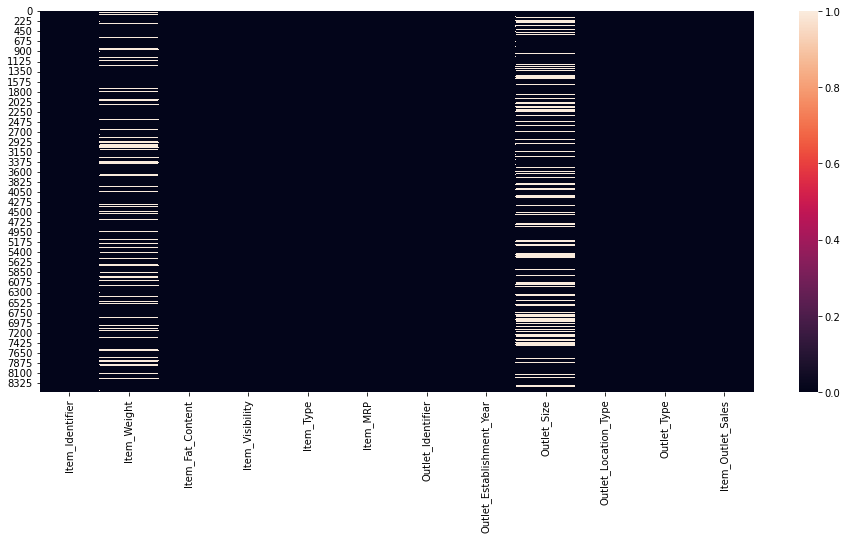

In [50]:
plt.figure(figsize=(16,7))
sns.heatmap(data=df_train.isnull());

In [37]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



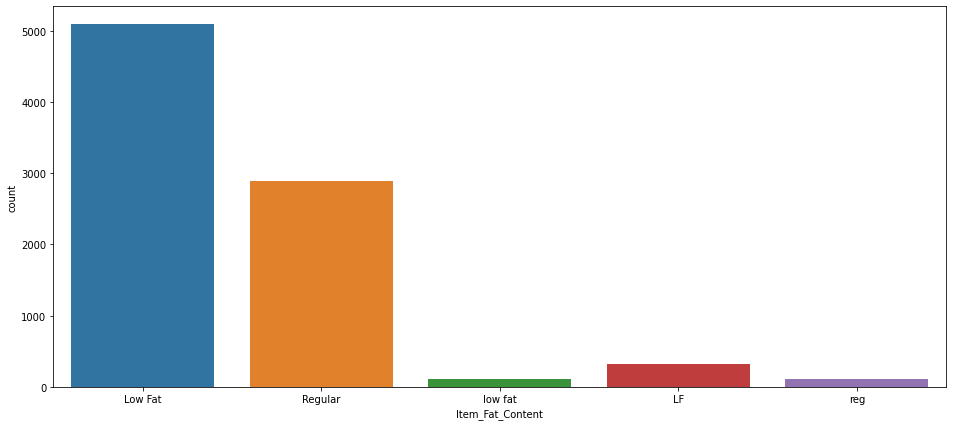

In [46]:
print(f'{df_train.Item_Fat_Content.value_counts()}\n')

plt.figure(figsize=(16,7))
sns.countplot(data=df_train, x='Item_Fat_Content');

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64



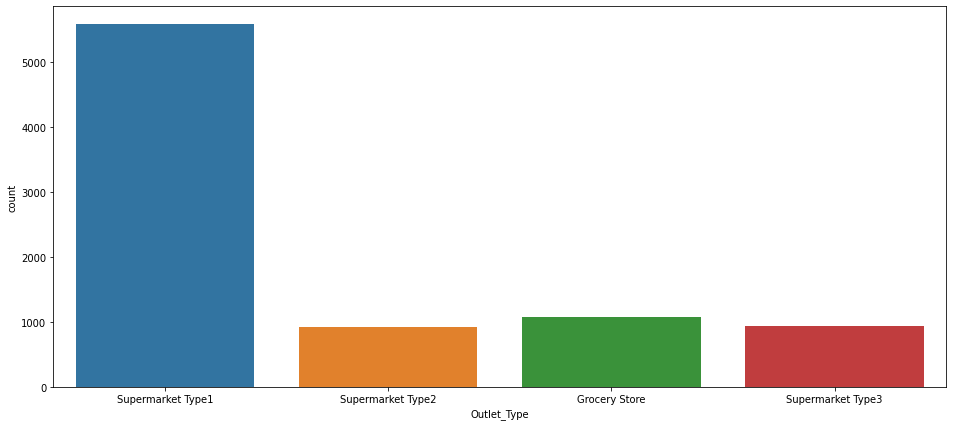

In [51]:
print(f'{df_train.Outlet_Type.value_counts()}\n')

plt.figure(figsize=(16,7))
sns.countplot(data=df_train, x='Outlet_Type');

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64



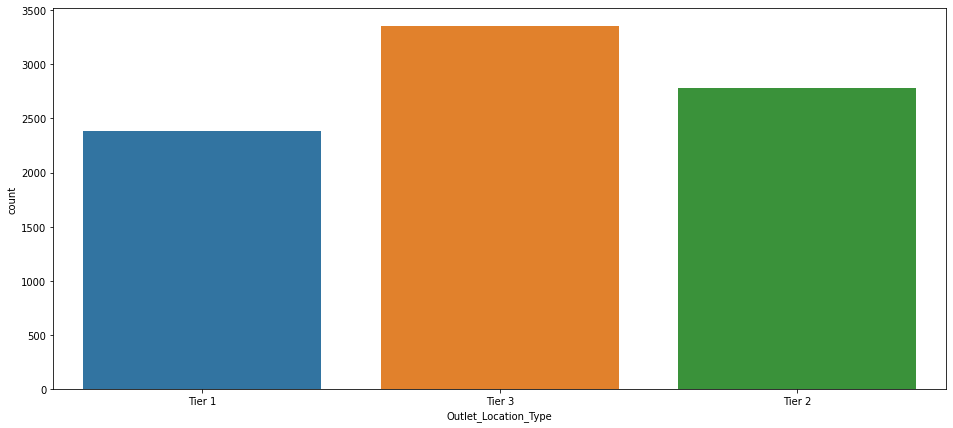

In [52]:
print(f'{df_train.Outlet_Location_Type.value_counts()}\n')

plt.figure(figsize=(16,7))
sns.countplot(data=df_train, x='Outlet_Location_Type');

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



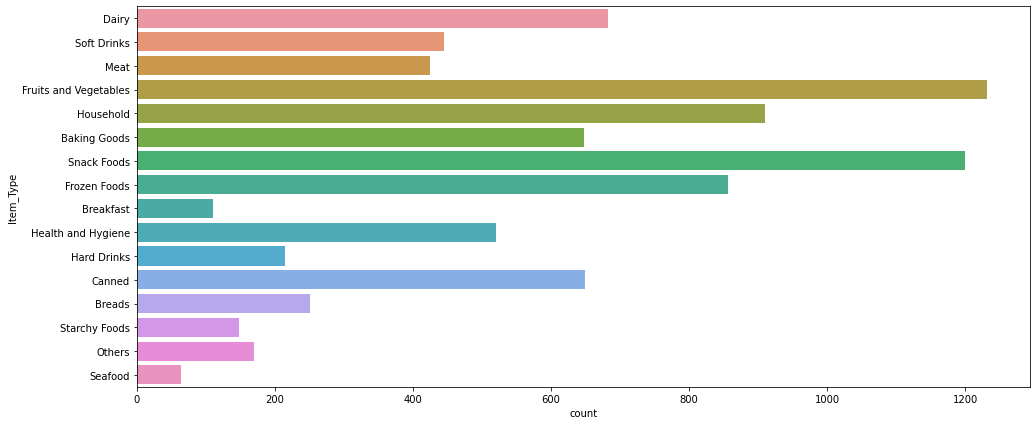

In [58]:
print(f'{df_train.Item_Type.value_counts()}\n')

plt.figure(figsize=(16,7))
sns.countplot(data=df_train, y='Item_Type');

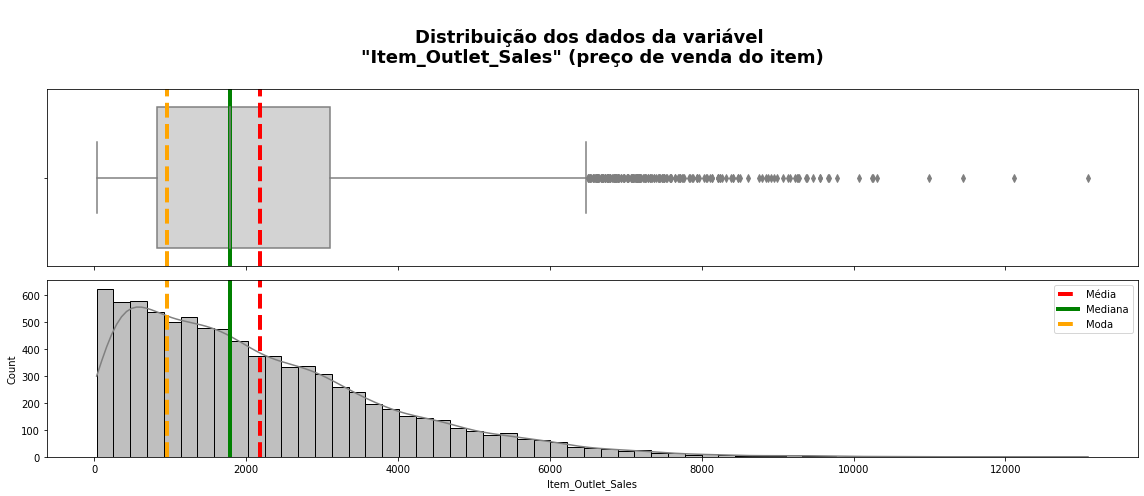

In [89]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Item_Outlet_Sales" (preço de venda do item)
mean = df_train['Item_Outlet_Sales'].mean()
median = df_train['Item_Outlet_Sales'].median()
mode = df_train['Item_Outlet_Sales'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(16,7))

sns.boxplot(data=df_train, x='Item_Outlet_Sales', ax=ax_box, color='lightgray')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável \n"Item_Outlet_Sales" (preço de venda do item)\n',
                 {'fontsize': 18,'fontweight': 'bold'})

sns.histplot(data=df_train, x='Item_Outlet_Sales', ax=ax_hist, kde=True, color='gray')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

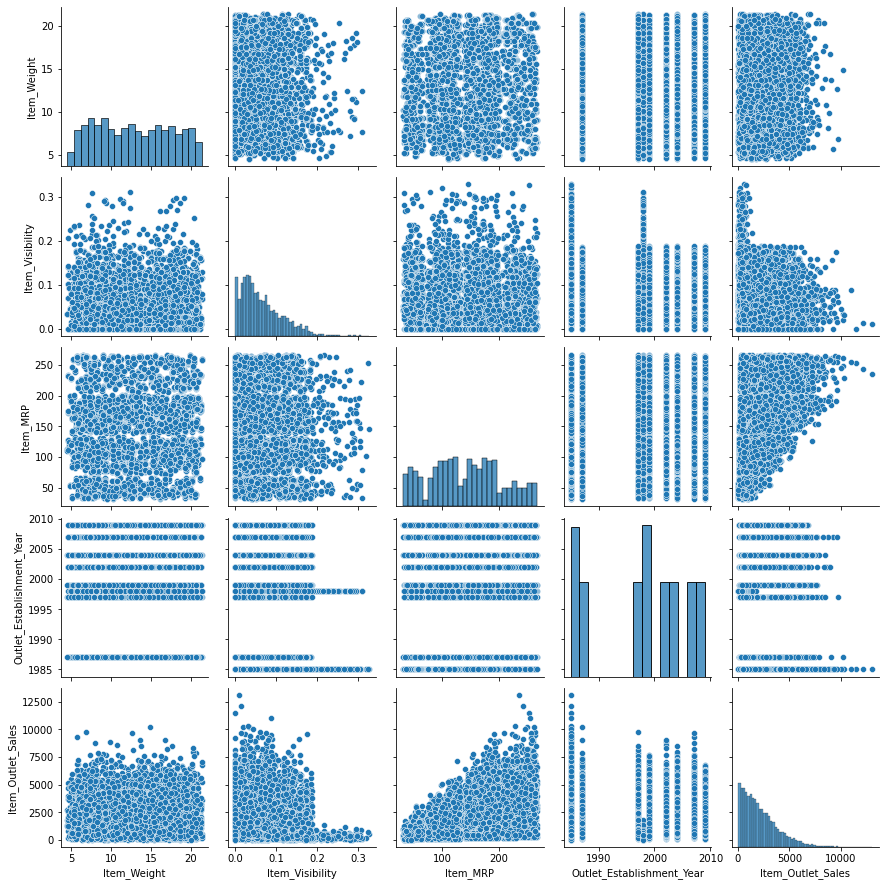

In [66]:
sns.pairplot(data=df_train);

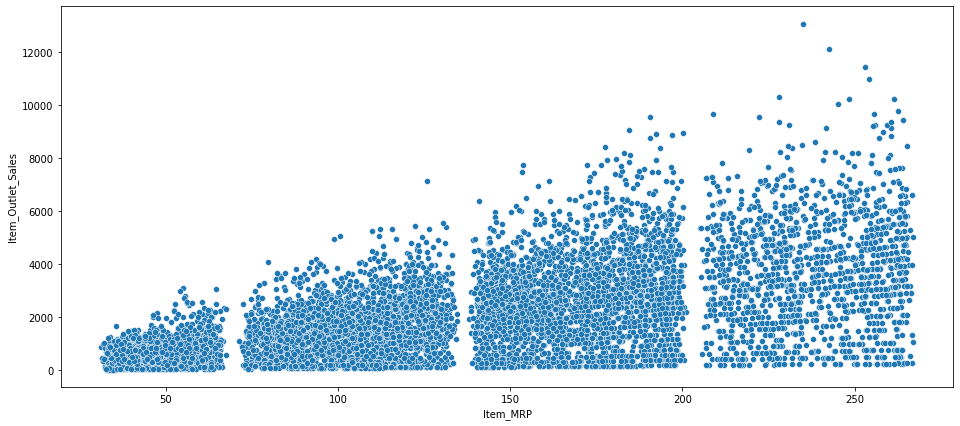

In [93]:
plt.figure(figsize=(16,7))
sns.scatterplot(data=df_train, 
                x='Item_MRP',
                y='Item_Outlet_Sales');

Variáveis Contínuas:
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

Visualização das Variáveis Contínuas


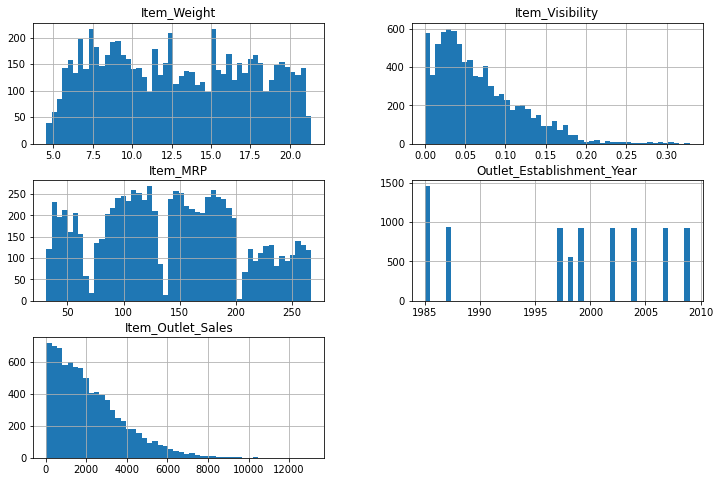

In [76]:
# visualizando os atributos numéricos contínuos
print('Variáveis Contínuas:')
continous_vars = df_train.describe().columns
print(continous_vars)

# gráfico de histograma dos atributos numéricos contínuos
print('\nVisualização das Variáveis Contínuas')
df_train.hist(column=continous_vars, bins=50, figsize=(12,8))
plt.show();

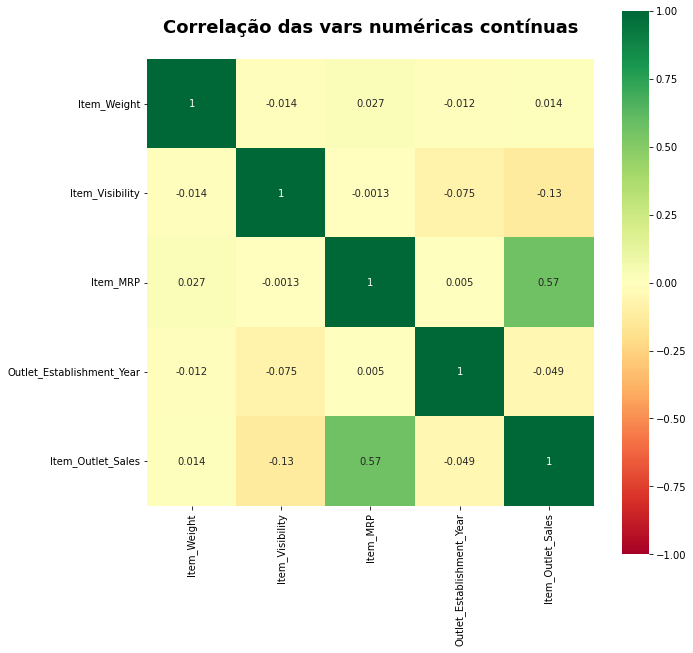

In [85]:
# gráfico de calor da correlação das variáveis numéricas
plt.figure(figsize=(10,10))

sns.heatmap(df_train.corr(), cmap='RdYlGn', vmin=-1.0, 
            annot=True, vmax=1.0, square=True)
plt.title('Correlação das vars numéricas contínuas\n', 
          {'fontsize': 18,'fontweight': 'bold'});

In [98]:
# realizando um ponto de corte da correlação entre as variáveis somente maior e/ou igual a 0.5
vars_num_corr = df_train.corr()['Item_Outlet_Sales'][:-1]
important_feats = vars_num_corr[abs(vars_num_corr) >= 0.5].sort_values(ascending=False)

print(f'Há {len(important_feats)} atributos com forte correlação com a variável alvo (Item_Outlet_Sales). \nSegue:')
important_feats

Há 1 atributos com forte correlação com a variável alvo (Item_Outlet_Sales). 
Segue:


Item_MRP    0.567574
Name: Item_Outlet_Sales, dtype: float64

**Pré-processamento dos dados**

Vamos construir um modelo `baseline`.

In [105]:
print(
    '\tValores nulos e/ou faltantes\n\n'
    f'Dados de treino: \n{df_train.isnull().sum()}',
    f'Dados de teste: \n{df_test.isnull().sum()}',
    sep='\n\n'
)

	Valores nulos e/ou faltantes

Dados de treino: 
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Dados de teste: 
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [106]:
# vamos realizar a inputação de valores nos campos nulos e/ou faltantes
df_train.fillna(-999, inplace=True)
df_test.fillna(-999, inplace=True)

In [108]:
df_train.isna().sum().any(), df_test.isna().sum().any()

(False, False)

In [110]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,-160.830931,381.595775,-999.00,6.650000,11.000000,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.00,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.29,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.00,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.29,834.247400,1794.331000,3101.296400,13086.964800


In [120]:
# instanciando as variáveis explicativas (X) e a resposta (y)
X = df_train.drop('Item_Outlet_Sales', axis=1)
y = df_train['Item_Outlet_Sales']

# tamanho das variáveis
len(X), len(y)

(8523, 8523)

In [121]:
print(
    f'\t\t++++++ [INFO] 5 amostras +++++\n'
    '\t\t==============================',
    f'Variáveis explicativas (X): \n{X.head()}', 
    f'Variável resposta (y): \n{np.array(y[:5])}',
    sep='\n\n' 
)

		++++++ [INFO] 5 amostras +++++

Variáveis explicativas (X): 
  Item_Identifier  Item_Weight  ... Outlet_Location_Type        Outlet_Type
0           FDA15         9.30  ...               Tier 1  Supermarket Type1
1           DRC01         5.92  ...               Tier 3  Supermarket Type2
2           FDN15        17.50  ...               Tier 1  Supermarket Type1
3           FDX07        19.20  ...               Tier 3      Grocery Store
4           NCD19         8.93  ...               Tier 3  Supermarket Type1

[5 rows x 11 columns]

Variável resposta (y): 
[3735.138   443.4228 2097.27    732.38    994.7052]


In [122]:
from sklearn.model_selection import train_test_split

In [123]:
# separando os dados de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.3,
                                                  random_state=42)

print(
    f'X_train: {X_train.shape}',
    f'X_test: {X_val.shape}',
    f'y_train: {y_train.shape}',
    f'y_test: {y_val.shape}',
    sep='\n'
)

X_train: (5966, 11)
X_test: (2557, 11)
y_train: (5966,)
y_test: (2557,)


In [124]:
# criando os índices das variáveis
categ_features_idx = np.where(X.dtypes != np.float)[0]
categ_features_idx

array([ 0,  2,  4,  6,  7,  8,  9, 10])

**Criando a máquina preditiva**

In [130]:
from catboost import CatBoostRegressor

In [131]:
baseline_model = CatBoostRegressor()

In [134]:
baseline_model.fit(X_train, y_train, 
                   cat_features=categ_features_idx,
                   eval_set=(X_val, y_val),
                   verbose=2,
                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.067403
0:	learn: 1663.8316225	test: 1618.4041998	best: 1618.4041998 (0)	total: 18.2ms	remaining: 18.2s
2:	learn: 1556.7254088	test: 1508.7512555	best: 1508.7512555 (2)	total: 47.4ms	remaining: 15.8s
4:	learn: 1470.1226569	test: 1420.0796117	best: 1420.0796117 (4)	total: 77ms	remaining: 15.3s
6:	learn: 1402.1477980	test: 1351.8390443	best: 1351.8390443 (6)	total: 96.2ms	remaining: 13.6s
8:	learn: 1342.3865936	test: 1291.5848860	best: 1291.5848860 (8)	total: 130ms	remaining: 14.3s
10:	learn: 1297.0790777	test: 1246.2795185	best: 1246.2795185 (10)	total: 156ms	remaining: 14s
12:	learn: 1253.2584604	test: 1203.6494743	best: 1203.6494743 (12)	total: 193ms	remaining: 14.7s
14:	learn: 1218.4412065	test: 1169.9860036	best: 1169.9860036 (14)	total: 232ms	remaining: 15.3s
16:	learn: 1190.9708394	test: 1143.1412277	best: 1143.1412277 (16)	total: 267ms	remaining: 15.4s
18:	learn: 1170.3377332	test: 1123.5761557	best: 1123.5761557 (18)	total: 301ms	remaining: 15.6s
20:	learn:

In [139]:
model_ajusted = CatBoostRegressor(iterations=1_500, learning_rate=0.1, 
                                  loss_function='RMSE')

In [140]:
model_ajusted.fit(X_train, y_train, 
                  cat_features=categ_features_idx,
                  eval_set=(X_val, y_val),
                  verbose=2,
                  plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1637.5523326	test: 1591.5791691	best: 1591.5791691 (0)	total: 18.8ms	remaining: 28.1s
2:	learn: 1490.4634363	test: 1441.2013008	best: 1441.2013008 (2)	total: 48ms	remaining: 24s
4:	learn: 1383.5979941	test: 1332.0027447	best: 1332.0027447 (4)	total: 76.9ms	remaining: 23s
6:	learn: 1309.0362205	test: 1258.0067142	best: 1258.0067142 (6)	total: 95.2ms	remaining: 20.3s
8:	learn: 1248.2196544	test: 1198.0677394	best: 1198.0677394 (8)	total: 128ms	remaining: 21.2s
10:	learn: 1201.2149596	test: 1152.7790332	best: 1152.7790332 (10)	total: 172ms	remaining: 23.3s
12:	learn: 1165.7091218	test: 1119.7857394	best: 1119.7857394 (12)	total: 207ms	remaining: 23.7s
14:	learn: 1141.0215840	test: 1097.9389142	best: 1097.9389142 (14)	total: 244ms	remaining: 24.1s
16:	learn: 1125.1098565	test: 1084.3815866	best: 1084.3815866 (16)	total: 274ms	remaining: 23.9s
18:	learn: 1113.3668193	test: 1074.7123289	best: 1074.7123289 (18)	total: 307ms	remaining: 24s
20:	learn: 1104.5235540	test: 1067.9978245	b

**Avaliação da máquina preditiva**

In [141]:
print(model_ajusted.best_iteration_)

38


In [142]:
# from PIL import Image

# img = Image.open()
# img.show()
# img

In [143]:
submission = pd.DataFrame()

submission['Item_Identifier'] = df_test['Item_Identifier']
submission['Outlet_Identifier'] = df_test['Outlet_Identifier']
submission['Item_Outlet_Sales'] = model_ajusted.predict(df_test)

submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1779.934266
1,FDW14,OUT017,1434.684550
2,NCN55,OUT010,661.724542
3,FDQ58,OUT017,2578.550113
4,FDY38,OUT027,6038.902824
...,...,...,...
5676,FDB58,OUT046,2158.946885
5677,FDD47,OUT018,2572.540477
5678,NCO17,OUT045,1928.820271
5679,FDJ26,OUT017,3435.689307


In [144]:
# exportando o arquivo 
submission.to_csv('submission.csv')